<a href="https://colab.research.google.com/github/princesapkota/regression_analysis_anxiety/blob/main/regressiontask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
df=pd.read_csv('/content/anxiety_attack_dataset.csv')

In [ ]:
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)',
       'High_Anxiety'],
      dtype='object')


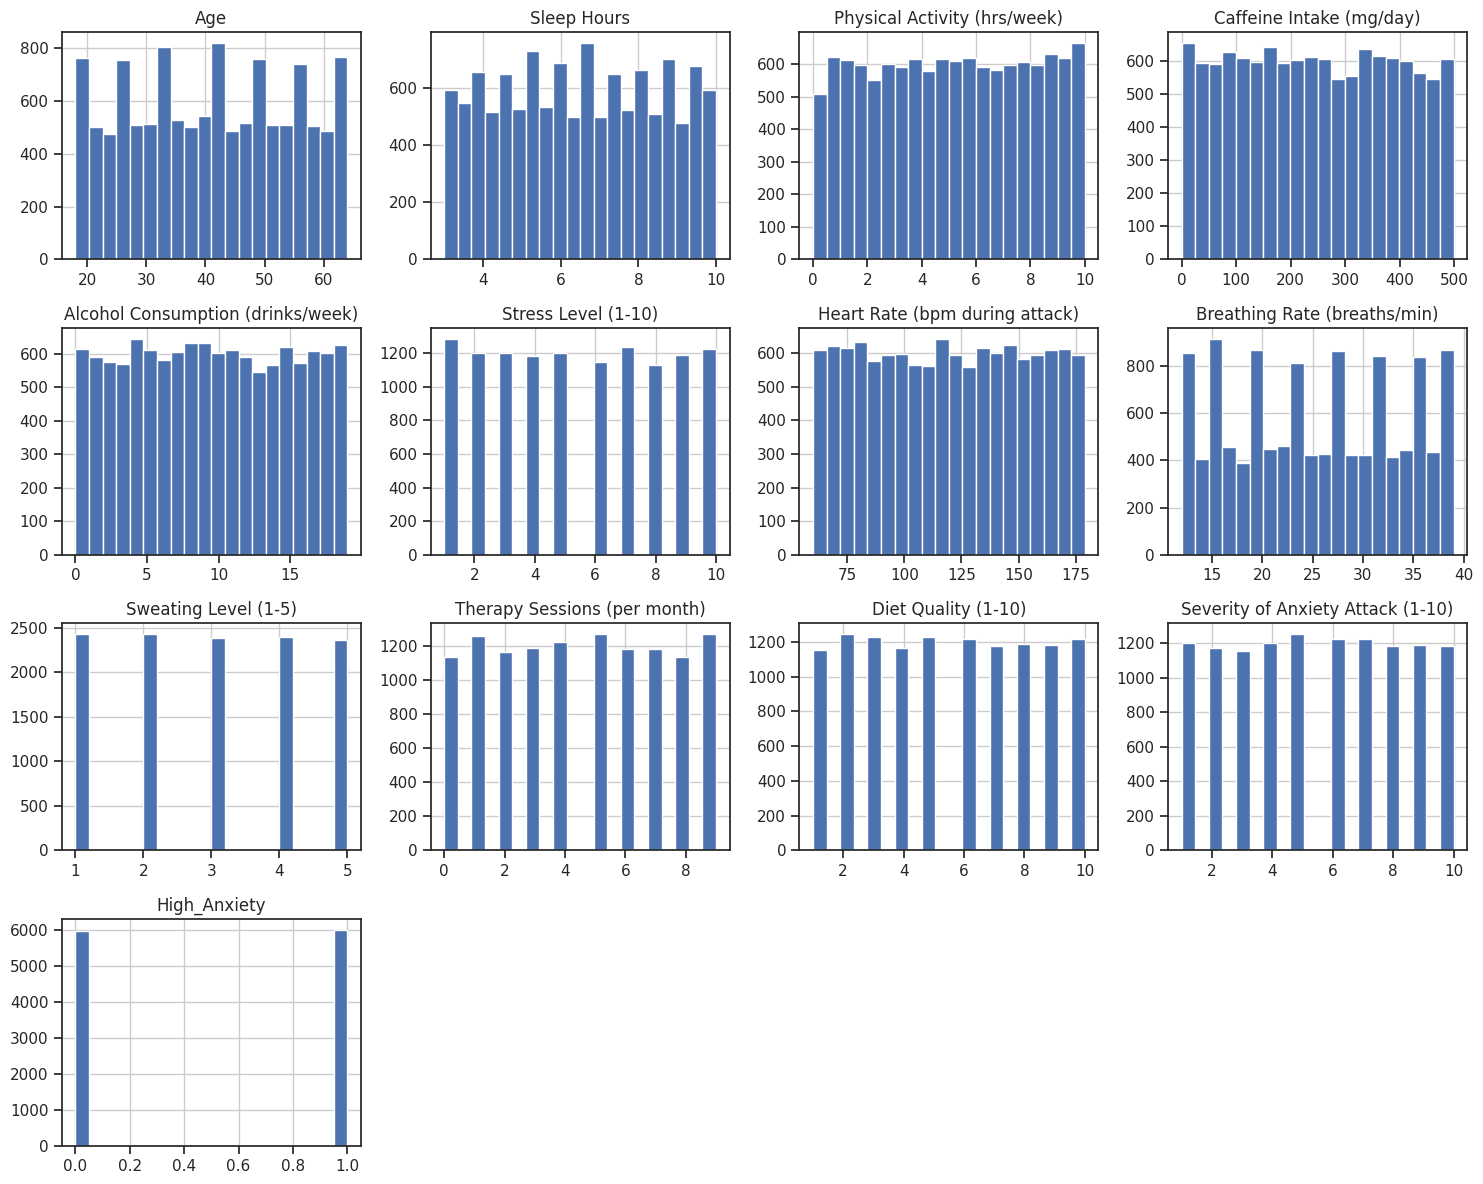

In [ ]:
df.hist(figsize=(15, 12), bins=20, layout=(5, 4))  # Adjust layout and bins
plt.tight_layout()  # Ensures proper spacing between plots
plt.show()

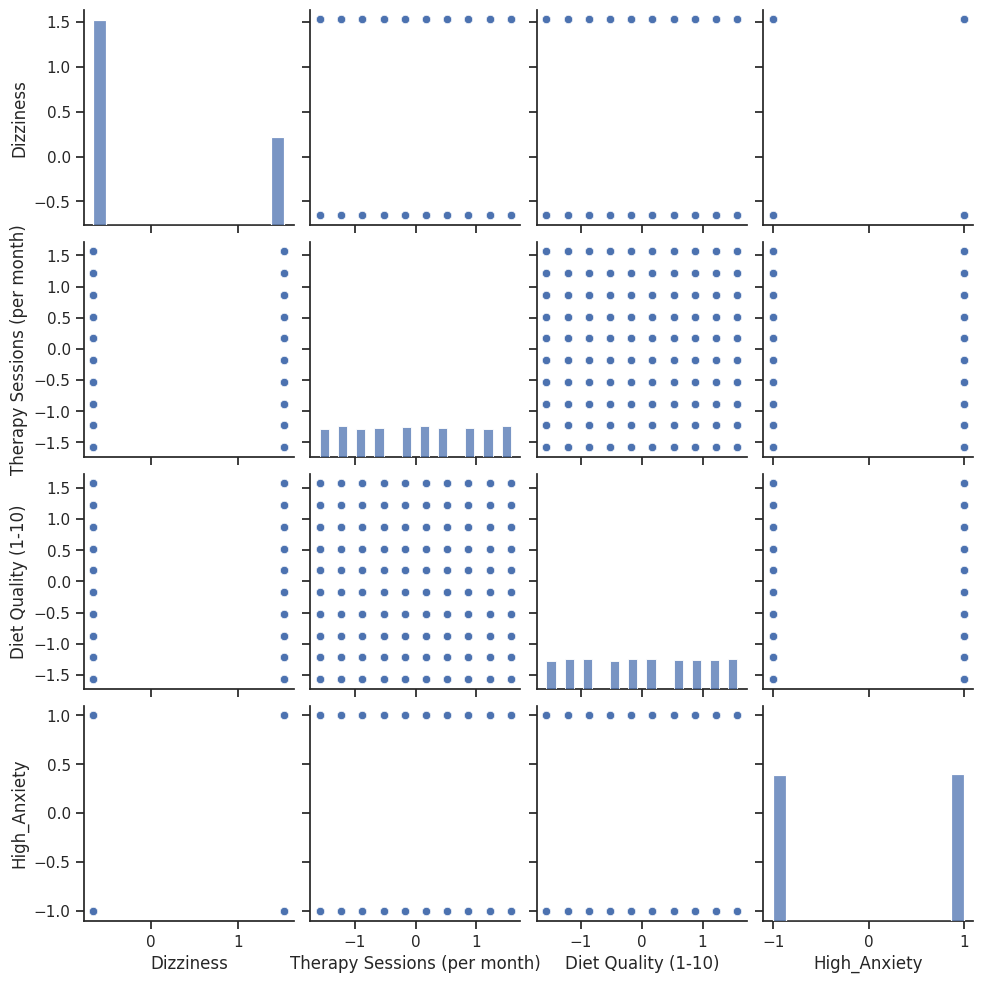

In [ ]:
sns.pairplot(df[["Dizziness", "Therapy Sessions (per month)", "Diet Quality (1-10)", "High_Anxiety"]])
plt.show()

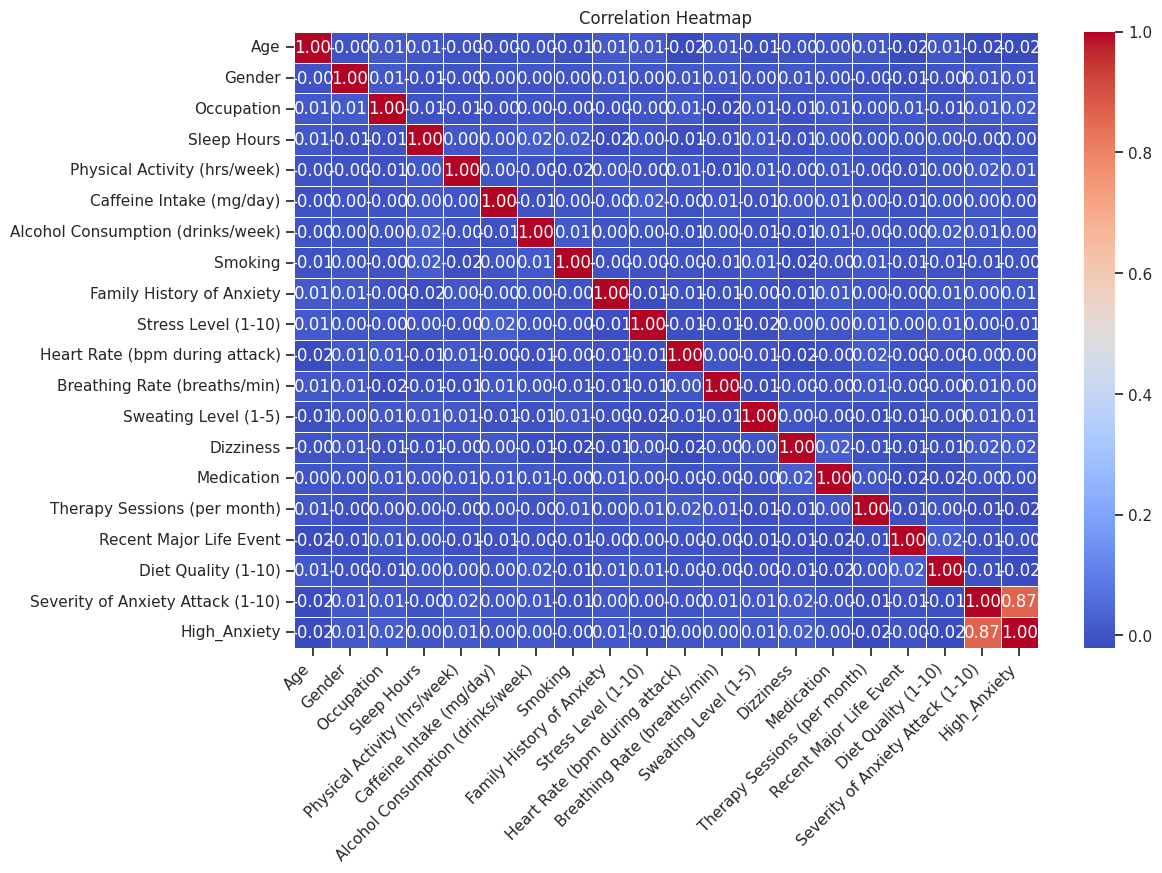

        Age    Gender  Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0  1.115829 -0.973412   -0.307659     1.547225                      1.131618   
1  0.373588  0.780747    0.851678    -0.041021                      0.785463   
2 -0.665549 -0.973412   -1.466996     0.207142                     -1.395313   
3  1.412725  0.780747   -1.466996     1.348694                     -0.460695   
4 -1.185117  0.780747    0.272009     1.348694                     -0.876081   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)   Smoking  \
0                 -0.496232                          -0.605436 -0.652446   
1                 -1.036095                          -0.605436 -0.652446   
2                  1.524795                           0.781257 -0.652446   
3                  1.552480                           1.127930 -0.652446   
4                  0.811898                          -1.298782 -0.652446   

   Family History of Anxiety  Stress Level (1-10)  \
0        

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to binary categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



# Normalize numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = StandardScaler().fit_transform(df[num_cols])

# Compute correlation matrix
corre = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corre, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()

# Display the first few rows to confirm changes
print(df.head())

2 models linear regression and random forest from scratch

In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

model_rf = RandomForestRegressor()
model_lr = LinearRegressionScratch(learning_rate=0.01, epochs=1000)

feature selection using random forest


In [ ]:
# Split data into features and target variable
X = df.drop(columns=['Severity of Anxiety Attack (1-10)'])
y = df['Severity of Anxiety Attack (1-10)']

# Feature selection using Random Forest
rf_selector = RandomForestRegressor(n_estimators=100, random_state=101)
rf_selector.fit(X, y)
feature_importances = rf_selector.feature_importances_
selected_features_rf = X.columns[feature_importances > 0.02]  # Select features with importance > 0.02
X = X[selected_features_rf]

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Convert all features to float before training
X_train = X_train.astype(float)
X_test = X_test.astype(float)

hyperparamter optimization

In [ ]:
# Define hyperparameter grids
param_grid_lr = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}

# Perform GridSearchCV for linear regressor modelelel
def grid_search_lr(X_train, y_train):
    learning_rates = [0.001, 0.01, 0.1]
    epochs_list = [500, 1000, 2000]
    best_score = float('-inf')
    best_params = {}

    for lr in learning_rates:
        for epochs in epochs_list:
            model = LinearRegressionScratch(learning_rate=lr, epochs=epochs)
            model.fit(X_train.values, y_train.values)
            y_pred = model.predict(X_train.values)
            score = r2_score(y_train, y_pred)

            if score > best_score:
                best_score = score
                best_params = {'learning_rate': lr, 'epochs': epochs}

    return best_params

best_params_lr = grid_search_lr(X_train, y_train)

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

train and prediction

In [ ]:
# Train custom Linear Regression model and random forest model
model_lr = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model_lr.fit(X_train.values, y_train.values)


best_rf.fit(X_train, y_train)

# Predictions
y_train_pred_lr = model_lr.predict(X_train.values)
y_test_pred_lr = model_lr.predict(X_test.values)
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

In [ ]:
# Calculate evaluation metrics
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_mae_lr = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_rf)

train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print("Best Linear Regressor Hyperparameters:", best_params_lr)
print("Best Random Forest Regressor Hyperparameters:", grid_search_rf.best_params_)

print("\nBest subset of features for linear:", list(selected_features_rf))
print("Best subset of features for Random Forest:", list(selected_features_rf))

print("\nLinear Regression:")
print(f"Train MSE: {train_mse_lr}")
print(f"Test MSE: {test_mse_lr}")
print(f"Train R-squared: {train_r2_lr}")
print(f"Test R-squared: {test_r2_lr}")

print("\nRandom Forest Regression:")
print(f"Train MSE: {train_mse_rf}")
print(f"Test MSE: {test_mse_rf}")
print(f"Train R-squared: {train_r2_rf}")
print(f"Test R-squared: {test_r2_rf}")

Best Linear Regressor Hyperparameters: {'learning_rate': 0.01, 'epochs': 2000}
Best Random Forest Regressor Hyperparameters: {'max_depth': 3, 'n_estimators': 50}

Best subset of features for linear: ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)', 'High_Anxiety']
Best subset of features for Random Forest: ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)', 'High_Anxiety']

Linear Regression:
Train MSE: 0.24779943938954568
Test MSE: 0.24518393092897076
Train R-squared: 0.7541021169870542
Test R-squared: 0.7468353947801085

Random Forest Regression:
Train MSE: 0.24607158190111608
Test MSE: 0.2457407008672053
Train R-squared: 0.7558167152912294
Test R-squared: 0.7462605021226761


best model out of the 2

In [ ]:
best_model = "random forest" if test_r2_lr > test_r2_rf else "linear scratch model"
print(f"\nBest performing model: {best_model}")


Best performing model: random forest


final model

In [ ]:
# Define the best subset of features
best_features = ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)', 'High_Anxiety']
X = df[best_features]
y = df['Severity of Anxiety Attack (1-10)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Define the best model with optimal hyperparameters
best_rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=101)

# Train the best model
best_rf.fit(X_train, y_train)

# Predictions
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

# Calculate evaluation metrics
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Print evaluation metrics
print("Best Model: Random Forest Regression")
print(f"Train MSE: {train_mse_rf}")
print(f"Test MSE: {test_mse_rf}")
print(f"Train R-squared: {train_r2_rf}")
print(f"Test R-squared: {test_r2_rf}")
print(f"Train MAE: {train_mae_rf}")
print(f"Test MAE: {test_mae_rf}")


Best Model: Random Forest Regression
Train MSE: 0.2460022705779948
Test MSE: 0.2457118693116028
Train R-squared: 0.7558854947350665
Test R-squared: 0.7462902721380451
Train MAE: 0.42404258240171505
Test MAE: 0.42374789739093294
